In [11]:
# TP 1 Analyse Des Reseaux Sociaux
# Par Guechtouli Anis & Bouhouita Hamza

In [12]:
# Importation des bibliothèques
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd

In [13]:
# Partie 1

In [14]:
# Créer un graphe non-orienté G
G = nx.Graph()
# et un graphe orienté DG
DG = nx.DiGraph()

In [15]:
# 1. Ajouter à chaque graphe les sommets nommés 1, 2, 3, 4 et 5.
sommets = [1, 2, 3, 4, 5]
G.add_nodes_from(sommets)
DG.add_nodes_from(sommets)

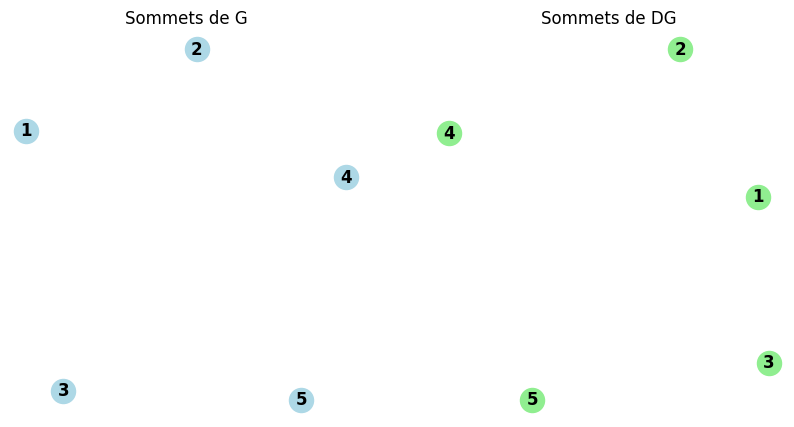

In [16]:
# 2. Afficher les sommets des graphes
# Creation d'une fonction d'affichage
def affichage(G,DG):

    # Création de la figure
    plt.figure(figsize=(10,5))

    # le graphe G
    plt.subplot(121)
    nx.draw(G, with_labels=True,
            node_color='lightblue',
            font_weight='bold',
            font_size=12)
    plt.title("Sommets de G")

    # le graphe DG
    plt.subplot(122)
    nx.draw(DG, with_labels=True,
            node_color='lightgreen',
            font_weight='bold',
            font_size=12)
    plt.title("Sommets de DG")

    plt.show()

affichage(G,DG)

Sommets de G après suppression de 1: [2, 3, 4, 5]


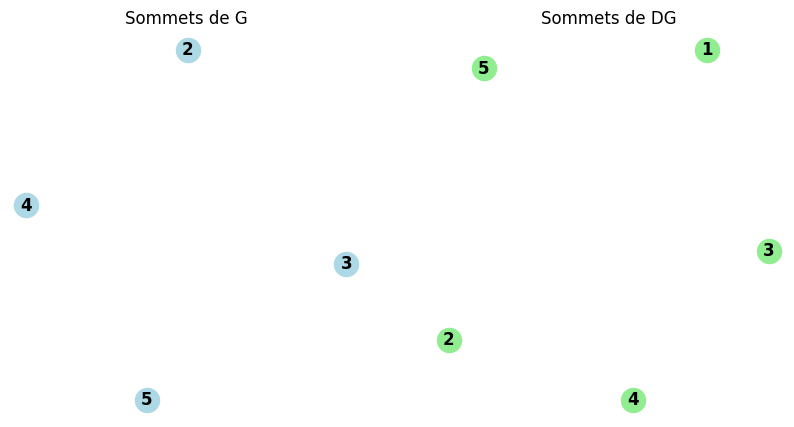

In [17]:
# 3. Supprimer le sommet 1 du graphe G
G.remove_node(1)
print(f"Sommets de G après suppression de 1: {G.nodes()}")
affichage(G,DG)

In [18]:
# 4. Ajouter les arêtes au graphe G
aretes_G = [(2, 3), (2, 5), (3, 4), (4, 5)]
G.add_edges_from(aretes_G)

# 5. Ajouter les arêtes au graphe DG
# L'ordre des sommets dans les arêtes est important pour les graphes orientés
aretes_DG = [(1, 3), (2, 3), (2, 4), (2, 5), (4, 5), (5, 1)]
DG.add_edges_from(aretes_DG)

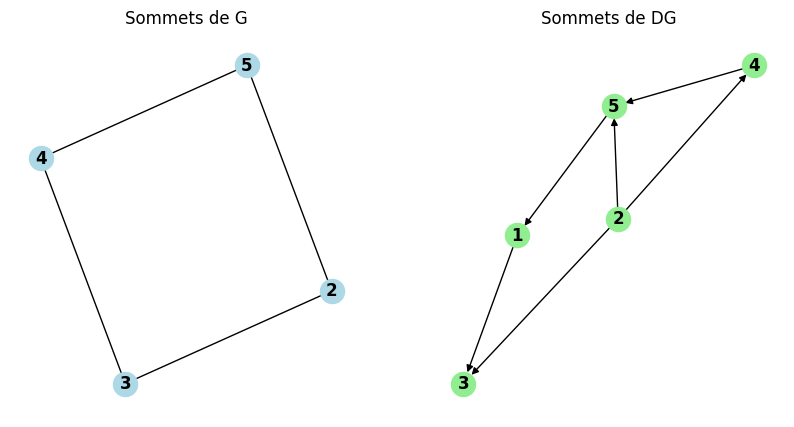

In [20]:
# 6. Tracer le graphe G et le graphe DG
affichage(G,DG)

In [21]:
# 7. Calculer et afficher la taille de G (nombre d'arêtes)
taille_G = G.size()

print(f"Taille de G: {taille_G}")

Taille de G: 4


In [22]:
# 8. Calculer et afficher l'ordre de G et DG (nombre de sommets)
ordre_G = G.number_of_nodes()
ordre_DG = DG.number_of_nodes()

print(f"Ordre de G  : {ordre_G}")
print(f"Ordre de DG : {ordre_DG}")

Ordre de G  : 4
Ordre de DG : 5


In [23]:
# 9. Déterminer et afficher la matrice d’adjacence de G
adj_matrix_G = nx.adjacency_matrix(G).todense()

# Convertir la matrice en Data Frame pour ajouter des labels pour un affichage plus clair
nodes_G = list(G.nodes())
df_adj_G = pd.DataFrame(adj_matrix_G, index=nodes_G, columns=nodes_G)

# Afficher la matrice d'adjacence formatée
print(f"Matrice d'adjacence de G:\n{df_adj_G}")

Matrice d'adjacence de G:
   2  3  4  5
2  0  1  0  1
3  1  0  1  0
4  0  1  0  1
5  1  0  1  0


In [24]:
# 10. Pondérer les arêtes de DG, avec des valeurs aléatoires entre 1 et 4
for u, v in DG.edges():
    DG[u][v]['weight'] = random.randint(1, 4)

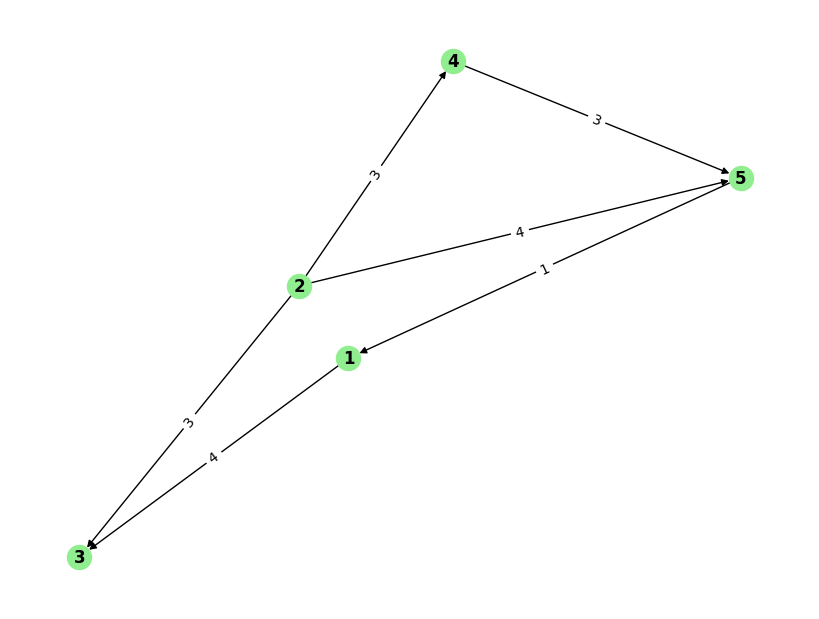

In [25]:
# Afficher le graphe pondéré DG
# Obtenir les poids des arêtes
edge_labels = nx.get_edge_attributes(DG, 'weight')

# Dessiner le graphe pondéré
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(DG)  # Disposition du graphe
nx.draw(DG, pos, with_labels=True, node_color='lightgreen', font_weight='bold', arrows=True, font_size=12)

# Ajouter les labels de poids aux arêtes
nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels)

plt.show()

In [26]:
# 11. Déterminer et afficher la matrice d’adjacence de DG
adj_matrix_DG = nx.adjacency_matrix(DG, weight='weight').todense()

# Convertir la matrice en DataFrame pour ajouter des labels
sommets_DG = list(DG.nodes())
df_adj_DG = pd.DataFrame(adj_matrix_DG, index=sommets_DG, columns=sommets_DG)

# Afficher la matrice d'adjacence pondérée formatée
print(f"Matrice d'adjacence de DG (pondérée):\n{df_adj_DG}")


Matrice d'adjacence de DG (pondérée):
   1  2  3  4  5
1  0  0  4  0  0
2  0  0  3  3  4
3  0  0  0  0  0
4  0  0  0  0  3
5  1  0  0  0  0


In [27]:
# 12. Afficher les listes d’adjacence de DG
adj_list_DG = {n: list(DG.neighbors(n)) for n in DG.nodes()}
for i in adj_list_DG:
    print(f"Voisins de {i} : {adj_list_DG[i]}")

Voisins de 1 : [3]
Voisins de 2 : [3, 4, 5]
Voisins de 3 : []
Voisins de 4 : [5]
Voisins de 5 : [1]


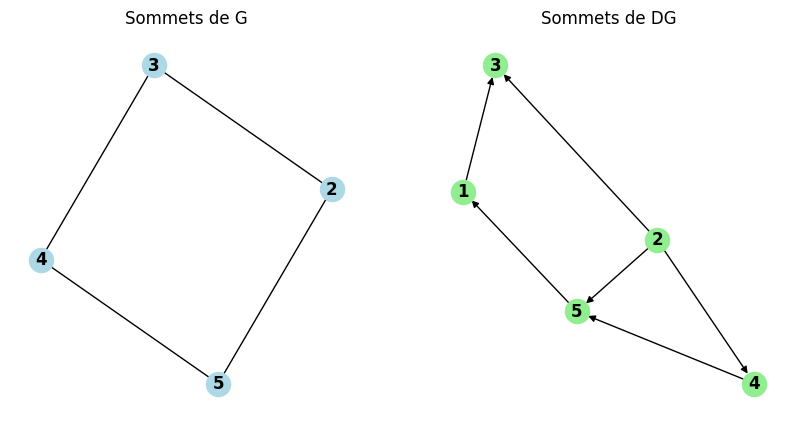

In [34]:
affichage(G,DG)

In [31]:
# Partie 2

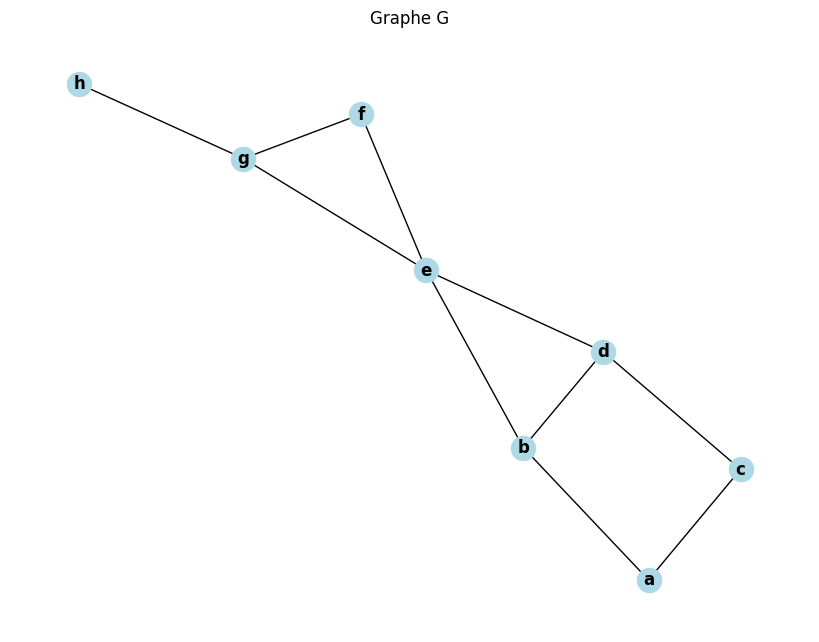

In [40]:
# 1. Implementation d'un graphe G en utilisant un dictionnaire

adj_matrix = {'a': ['b', 'c'],              # sommet a
              'b': ['a', 'd', 'e'],         # sommet b
              'c': ['a', 'd'],              # sommet c
              'd': ['b', 'c', 'e'],         # sommet d
              'e': ['b', 'd', 'f', 'g'],    # sommet e
              'f': ['e', 'g'],              # sommet f
              'g': ['e', 'f', 'h'],         # sommet g
              'h': ['g']}                   # sommet h

G = nx.Graph(adj_matrix)

# Définir la position des noeuds une fois pour garder une mise en page stable
pos = nx.spring_layout(G)  # Calculer les positions avant le parcours

# afficher le graphe
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True,
        node_color='lightblue',
        font_weight='bold',
        font_size=12)
plt.title("Graphe G")
plt.show()

In [41]:
# Fonction pour visualiser en direct le parcours en profondeur
def ParcourirProfondeurLive(Graphe, Sommet, Visitee=None, pos=None):
    if Visitee is None:
        Visitee = set()  # Ensemble pour stocker les sommets visités
    
    Visitee.add(Sommet)  # Marquer le sommet comme visité
    print(f"Visite du sommet {Sommet}")
    
    # Dessiner le graphe avec les sommets colorés selon leur statut (visité ou non)
    couleurs_sommets = ['green' if node in Visitee else 'lightblue' for node in Graphe.nodes()]
    
    # Effacer le graphique précédent et dessiner le nouveau
    plt.clf()
    nx.draw(Graphe, pos, with_labels=True, node_color=couleurs_sommets, font_weight='bold', node_size=700)
    
    # Afficher la mise à jour
    plt.draw()
    plt.pause(0.8)  # Pause pour permettre de voir chaque étape du parcours
    
    # Parcourir les voisins du sommet
    for voisin in Graphe[Sommet]:
        if voisin not in Visitee:  # Si le voisin n'est pas encore visité
            ParcourirProfondeurLive(Graphe, voisin, Visitee, pos)

Visite du sommet a


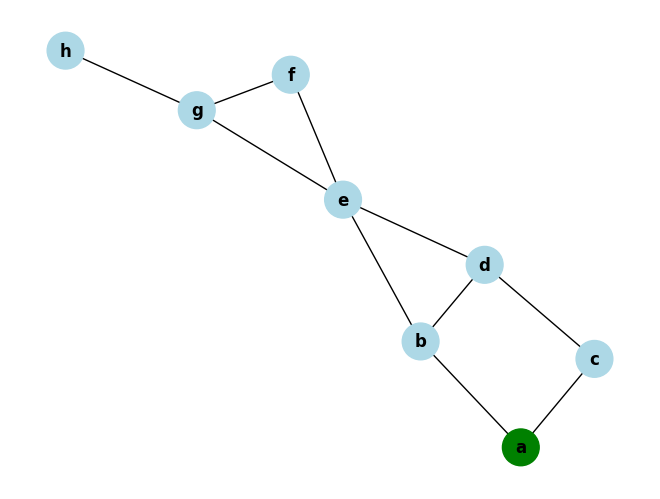

Visite du sommet b


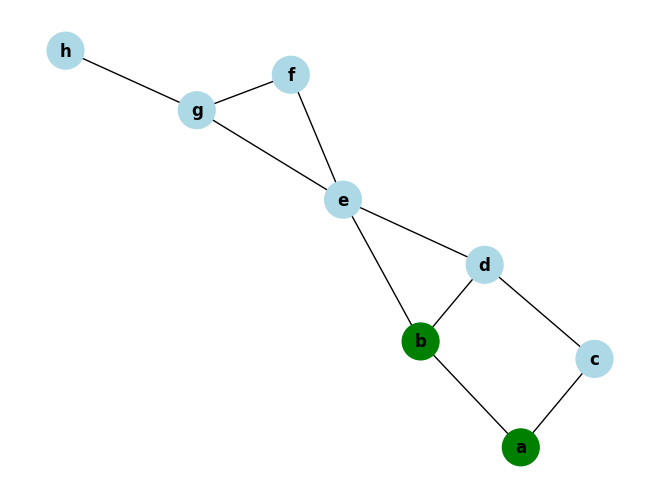

Visite du sommet d


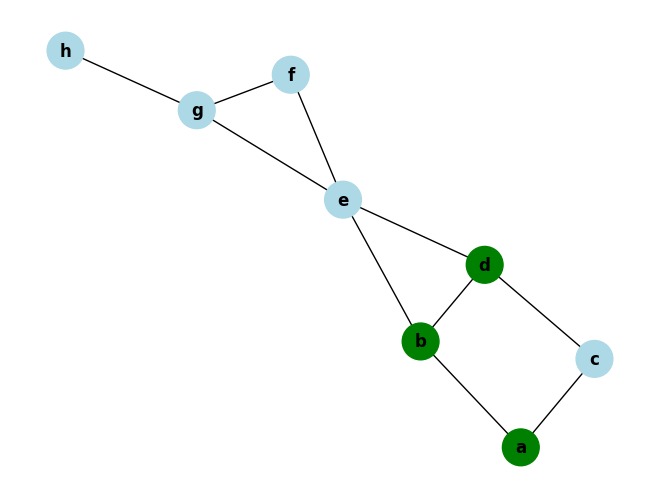

Visite du sommet c


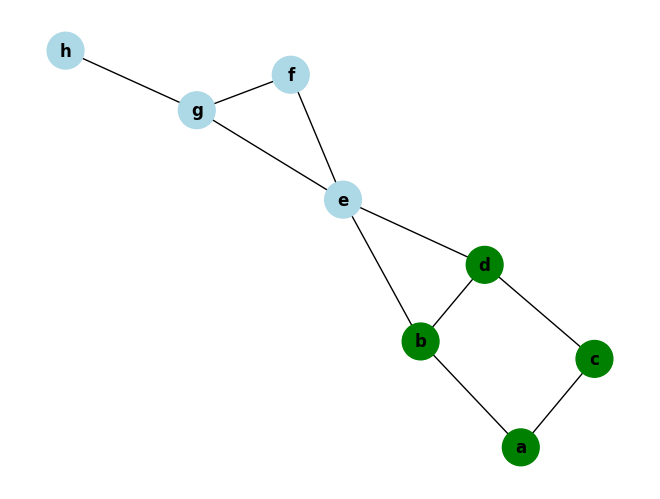

Visite du sommet e


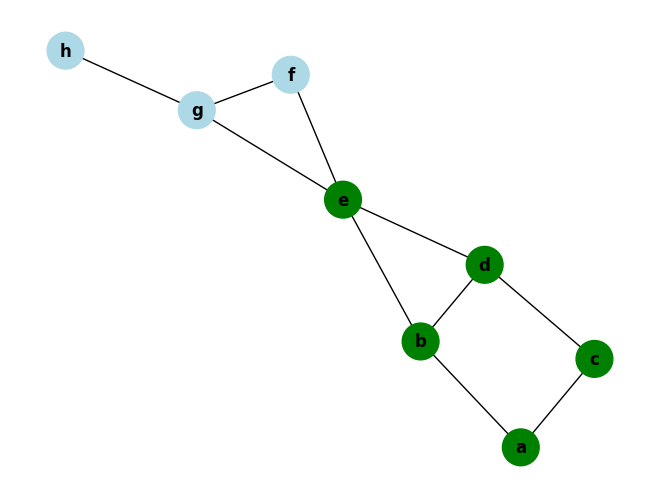

Visite du sommet f


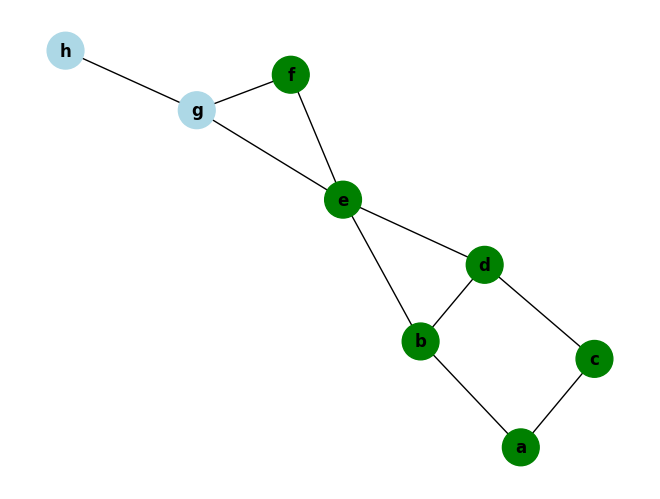

Visite du sommet g


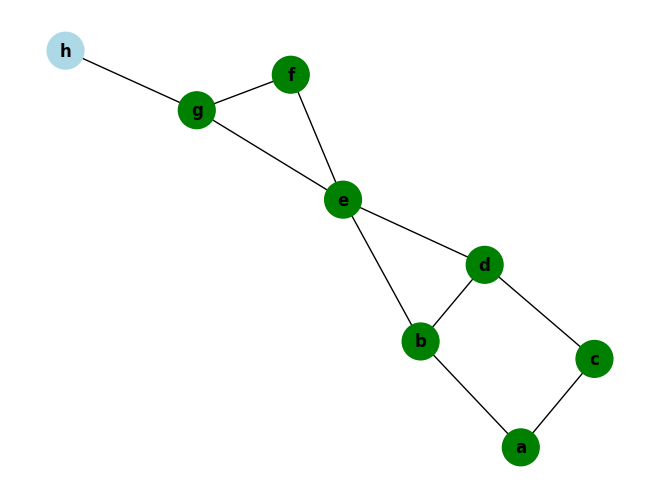

Visite du sommet h


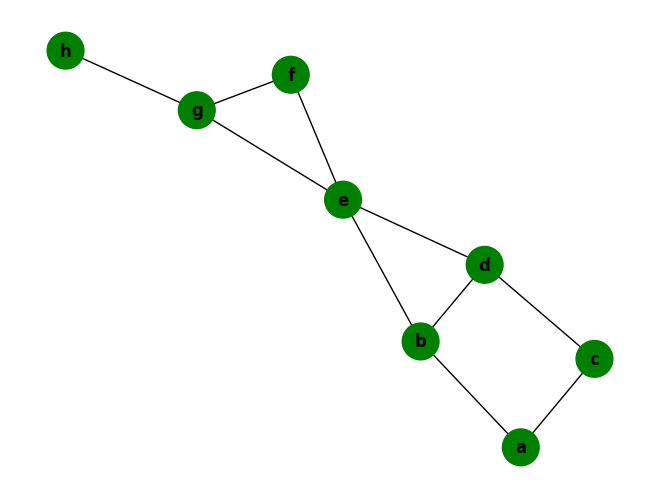

In [42]:
# Lancer le parcours en profondeur avec visualisation à partir du sommet a
ParcourirProfondeurLive(G, 'a', pos=pos)

# Garder l'affichage ouvert
plt.show(block=True)

Visite du sommet f


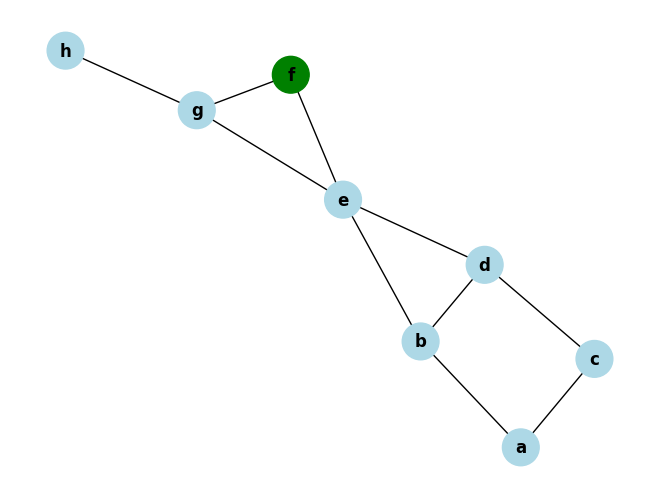

Visite du sommet e


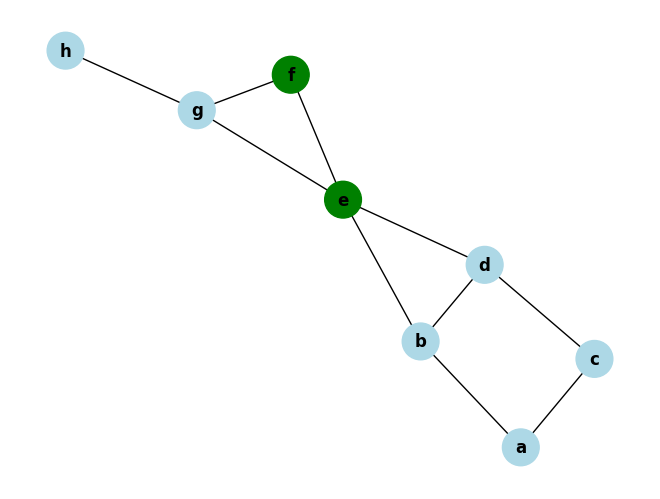

Visite du sommet b


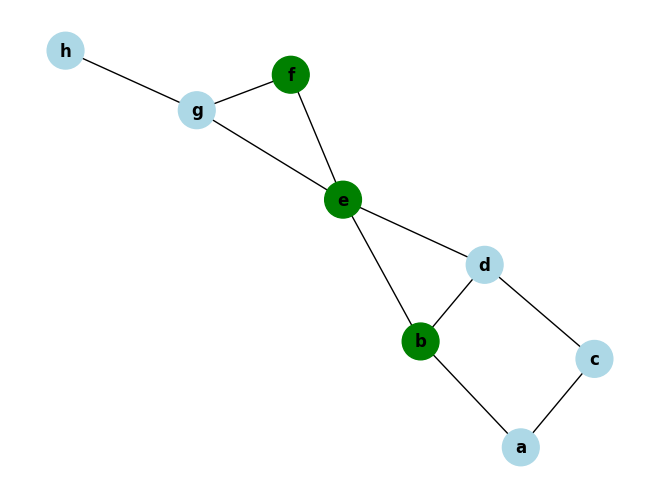

Visite du sommet a


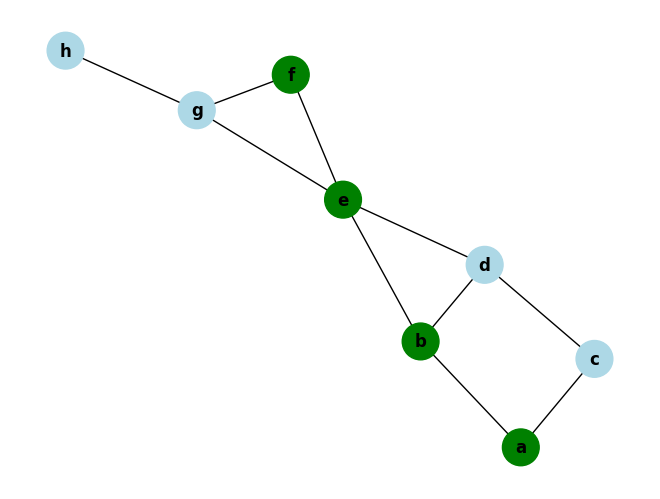

Visite du sommet c


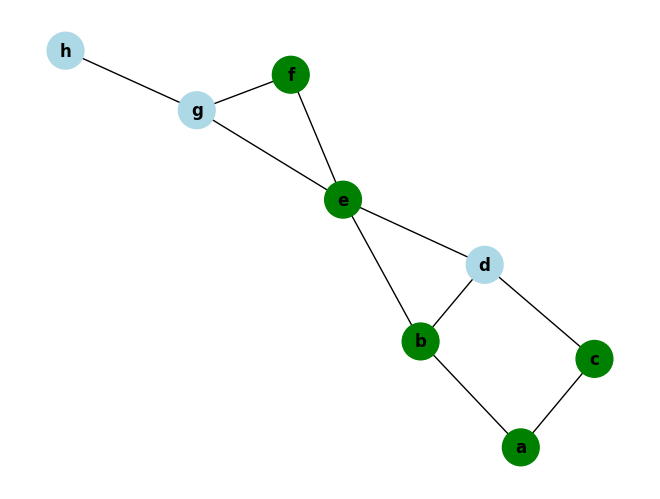

Visite du sommet d


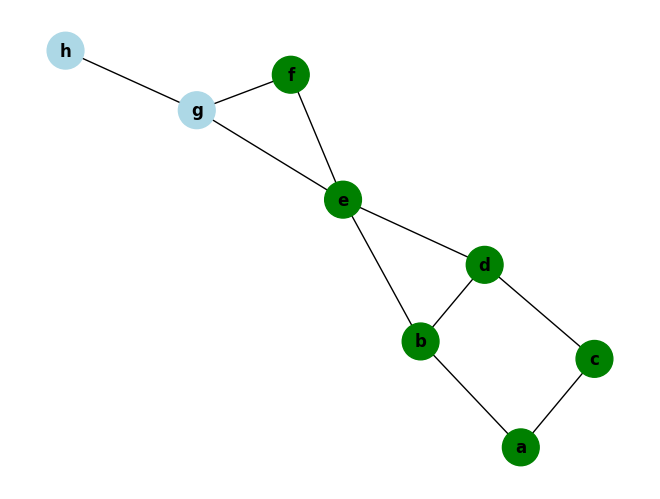

Visite du sommet g


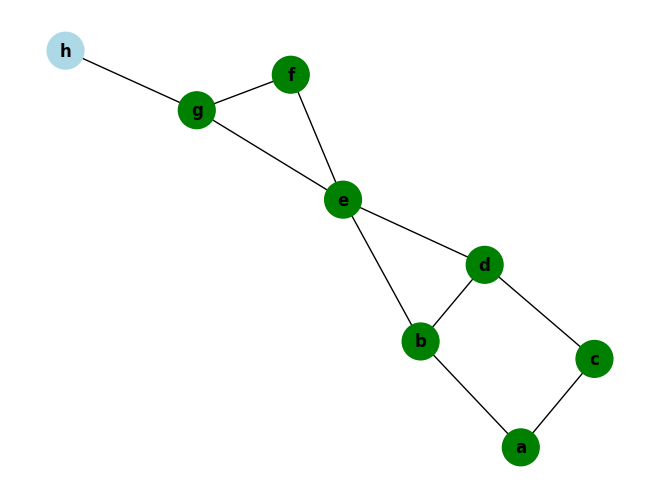

Visite du sommet h


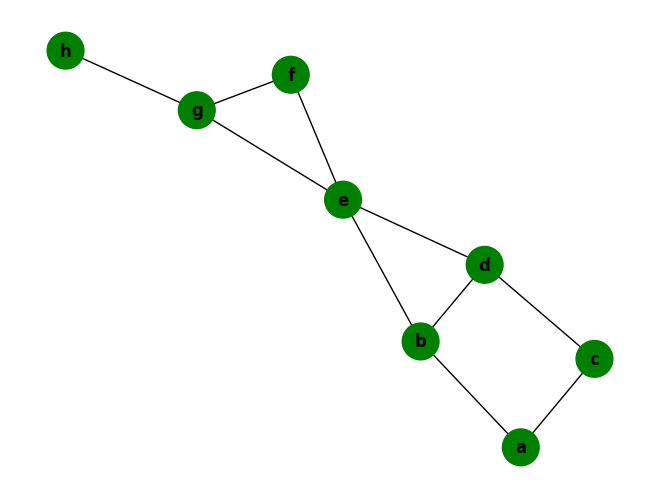

In [43]:
# Lancer le parcours en profondeur avec visualisation à partir du sommet f
ParcourirProfondeurLive(G, 'f', pos=pos)